In [38]:
%matplotlib inline

In [40]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np
from collections import defaultdict
import itertools

In [6]:
import sys
project_path = "/media/sarthak/HDD/TUM/courses/sem 3/practical DM/Amazon-Mining"
# make sure to use position 1
sys.path.insert(1, project_path)

In [11]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [23]:
def get_cat(l):
    return l[1]

## data loading

In [7]:
from src.data.json_loader import JSONLoader
# file_path corresponds to the file of the .gz file which contains the JSON file. 
product_path = '/media/sarthak/HDD/TUM/courses/sem 3/practical DM/datasets/meta_Electronics.json.gz'
loader = JSONLoader()
product = loader.load_data(product_path)

In [8]:
reviews_path = '/media/sarthak/HDD/TUM/courses/sem 3/practical DM/datasets/reviews_Electronics_5.json.gz'
reviews = loader.load_data(reviews_path)

In [9]:
product.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [12]:
product.categories = product.categories.apply(flatten)

In [13]:
product.shape

(498196, 9)

In [14]:
product.categories

0         [Electronics, Computers & Accessories, Cables ...
1         [Electronics, Computers & Accessories, Cables ...
2         [Electronics, Computers & Accessories, PDAs, H...
3         [Electronics, Accessories & Supplies, Audio & ...
4         [Electronics, GPS & Navigation, Vehicle GPS, T...
5         [Electronics, Accessories & Supplies, Audio & ...
6         [Electronics, eBook Readers & Accessories, Pow...
7         [Electronics, eBook Readers & Accessories, Skins]
8         [Electronics, eBook Readers & Accessories, Cov...
9         [Electronics, eBook Readers & Accessories, Cov...
10        [Electronics, eBook Readers & Accessories, Cov...
11        [Electronics, eBook Readers & Accessories, Cov...
12        [Electronics, Computers & Accessories, Touch S...
13        [Electronics, eBook Readers & Accessories, Cov...
14        [Electronics, Accessories & Supplies, Audio & ...
15        [Electronics, Computers & Accessories, Touch S...
16        [Electronics, eBook Readers & 

In [15]:
product.ix[0]

/media/sarthak/HDD/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


asin                                                  0132793040
imUrl          http://ecx.images-amazon.com/images/I/31JIPhp%...
description    The Kelby Training DVD Mastering Blend Modes i...
categories     [Electronics, Computers & Accessories, Cables ...
title          Kelby Training DVD: Mastering Blend Modes in A...
price                                                        NaN
salesRank                                                    NaN
related                                                      NaN
brand                                                        NaN
Name: 0, dtype: object

In [16]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [17]:
len(reviews.reviewerID.unique())

192403

In [18]:
reviews.shape

(1689188, 9)

# common products between 2 datasets

In [ ]:
common_products = product.loc[product.asin.isin(reviews.asin), ]

In [ ]:
common_products.shape

In [ ]:
common_products.to_csv('common_products.csv', index=False)

In [ ]:
reviews_indexed_by_reviewerID = reviews.set_index(['reviewerID'])

In [ ]:
unique_reviewer = np.unique(reviews.reviewerID)

In [ ]:
len(unique_reviewer)

In [ ]:
reviews_by_reviewer = reviews.groupby(by=['reviewerID'])['asin'].count()

In [ ]:
review_to_asin = reviews.groupby(by=['reviewerID'])['asin'].unique()

In [ ]:
review_to_asin

# merging 2 datasets

In [19]:
merged_reviews = reviews.merge(product, on='asin')

In [20]:
merged_reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[Electronics, GPS & Navigation, Vehicle GPS, T...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[Electronics, GPS & Navigation, Vehicle GPS, T...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[Electronics, GPS & Navigation, Vehicle GPS, T...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[Electronics, GPS & Navigation, Vehicle GPS, T...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[Electronics, GPS & Navigation, Vehicle GPS, T...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5.0,HDMI Nook adapter cable,1388707200,"01 3, 2014",http://ecx.images-amazon.com/images/I/51RjSETO...,HDTV Adapter Kit for NOOK HD and NOOK HD+\nThi...,"[Electronics, Computers & Accessories, Touch S...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,49.95,NaN,"{'also_bought': ['B009L7EEZA', 'B00AGAYQEU', '...",NaN
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2.0,Cheap proprietary scam,1398556800,"04 27, 2014",http://ecx.images-amazon.com/images/I/51RjSETO...,HDTV Adapter Kit for NOOK HD and NOOK HD+\nThi...,"[Electronics, Computers & Accessories, Touch S...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,49.95,NaN,"{'also_bought': ['B009L7EEZA', 'B00AGAYQEU', '...",NaN
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5.0,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014",http://ecx.images-amazon.com/images/I/51RjSETO...,HDTV Adapter Kit for NOOK HD and NOOK HD+\nThi...,"[Electronics, Computers & Accessories, Touch S...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,49.95,NaN,"{'also_bought': ['B009L7EEZA', 'B00AGAYQEU', '...",NaN
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4.0,A nice easy to use accessory.,1405036800,"07 11, 2014",http://ecx.images-amazon.com/images/I/51RjSETO...,HDTV Adapter Kit for NOOK HD and NOOK HD+\nThi...,"[Electronics, Computers & Accessories, Touch S...",Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,49.95,NaN,"{'also_bought': ['B009L7EEZ

# do reviewer tend to review consistent category?

In [21]:
reviewer_consistency = merged_reviews[['reviewerID', 'categories']]

In [24]:
reviewer_consistency.categories = reviewer_consistency.categories.apply(get_cat)

/media/sarthak/HDD/Anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [25]:
reviewer_to_categories = reviewer_consistency.groupby(by='reviewerID')['categories']

In [26]:
num_cats_reviewed = []
for key, item in reviewer_to_categories:
    num_cats_reviewed.append(len(set(reviewer_to_categories.get_group(key))))

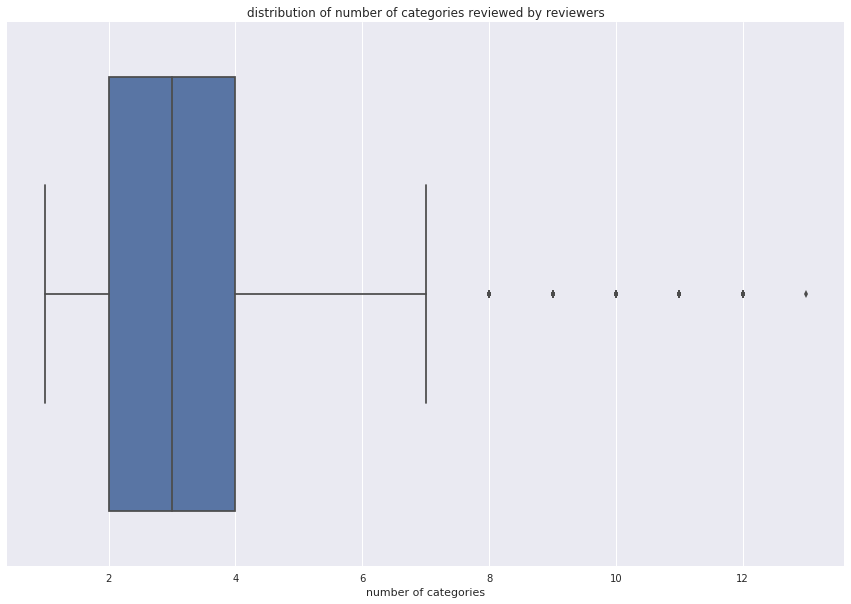

In [182]:
fig, ax = plt.subplots(figsize=(15, 10))
box = sns.boxplot(x=num_cats_reviewed)
ax.set_title('distribution of number of categories reviewed by reviewers')
ax.set(xlabel='number of categories')
box = box.get_figure()
box.savefig('box.png') 

In [181]:
average_reviewed = float(sum(num_cats_reviewed) / len(num_cats_reviewed))
max_reviewed = max(num_cats_reviewed)
min_reviewed = min(num_cats_reviewed)
print(average_reviewed, max_reviewed, min_reviewed)

3.258000135133028 13 1


In [126]:
for key, item in reviewer_to_categories:
    print(reviewer_to_categories.get_group(key))
    break

321546     Accessories & Supplies
450446     Portable Audio & Video
738088     Accessories & Supplies
766200     Accessories & Supplies
1678142            Camera & Photo
Name: categories, dtype: object


# sentiment analysis on different overall scores

In [48]:
from textblob import TextBlob

In [49]:
ratings_to_reviews = merged_reviews.groupby(by=['overall'])['reviewText', 'summary']

In [52]:
average = []
polarities = []
for key, item in ratings_to_reviews:
    sentiments = []
    scored_reviews = ratings_to_reviews.get_group(key)
    scored_reviews.reset_index(inplace=True, drop=True)
    polarity = [TextBlob(review_text).sentiment.polarity for review_text in scored_reviews.reviewText]
    avg = sum(polarity) / float(len(polarity))
    polarities.append(polarity)
    average.append(avg) 

In [99]:
values = defaultdict(list)
for idx, polarity in enumerate(polarities):
    negatives = [x for x in polarity if x <= -0.10]
    neutral = [x for x in polarity if x > -0.10 and x < 0.10]
    positives = [x for x in polarity if x >= 0.10]
    values[idx+1].append(len(negatives)/len(polarity) * 100)
    values[idx+1].append(len(neutral)/len(polarity) * 100)
    values[idx+1].append(len(positives)/len(polarity) * 100)

In [112]:
from pandas import DataFrame
polarity_df = DataFrame.from_dict(values)
polarity_df = polarity_df.transpose()
polarity_df.rename(columns={0: "negative reviews", 1: "neutral reviews", 2: "positive reviews"}, inplace=True)
polarity_df.index.rename('overall rating', inplace=True)
polarity_df

,negative reviews,neutral reviews,positive reviews
overall rating,,,
1,16.896758,46.383077,36.720166
2,9.110167,41.981276,48.908557
3,5.132964,32.477839,62.389197
4,2.341510,21.420236,76.238254
5,1.901041,14.861361,83.237597


In [76]:
import seaborn as sns; sns.set()

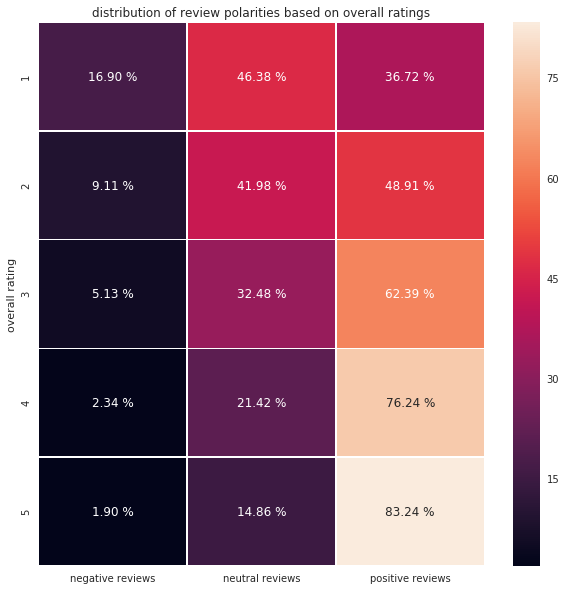

In [119]:
fig, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(polarity_df, annot=True,  fmt='.2f', linewidths=.5, ax=ax)
ax.set_title('distribution of review polarities based on overall ratings')
for t in ax.texts: t.set_text(t.get_text() + " %")

In [120]:
heatmap = heatmap.get_figure()
heatmap.savefig('heatmap.png') 

# number and mean of ratings by product category

In [165]:
asin_to_overall_mean = merged_reviews.groupby(by=['asin'])['overall'].mean()
asin_to_overall_mean = asin_to_overall_mean.to_frame()
asin_to_overall_mean['asin'] = asin_to_overall_mean.index
asin_to_overall_mean.reset_index(inplace=True, drop=True)
asin_to_overall_mean

,overall,asin
0,2.400000,0528881469
1,4.200000,0594451647
2,4.000000,0594481813
3,4.461187,0972683275
4,3.953488,1400501466
5,4.400000,1400501520
6,4.150000,1400501776
7,3.609756,1400532620
8,3.807339,1400532655
9,3.830986,140053271X


In [167]:
asin_to_overall_mean_category = asin_to_overall_mean.merge(product, on='asin')
asin_to_overall_mean_category['category'] = asin_to_overall_mean_category.categories.apply(get_cat)

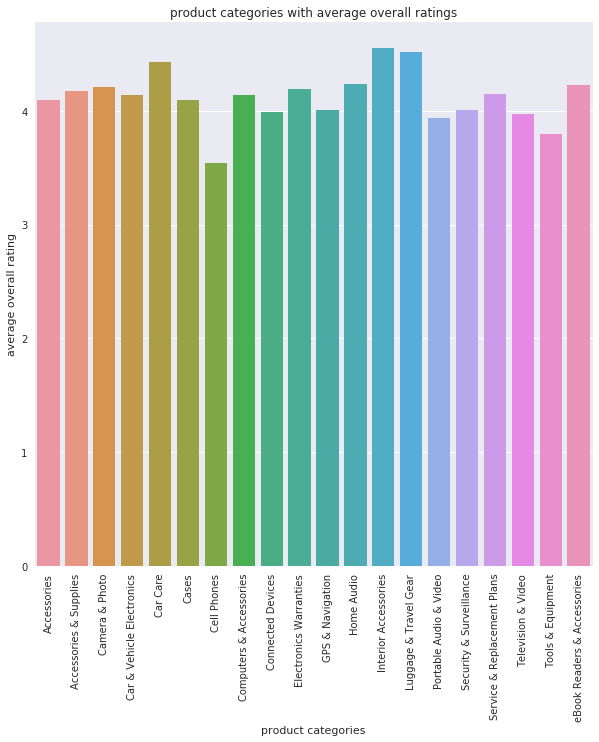

In [173]:
category_mean = asin_to_overall_mean_category.groupby(by='category')['overall'].mean()
fig, ax = plt.subplots(figsize=(10,10))
barplot = sns.barplot(x=category_mean.index, 
            y=category_mean,
           orient = 'v',
                     ax=ax)
ax.set_title('product categories with average overall ratings')
ax.set(xlabel='product categories', ylabel='average overall rating')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
barplot = barplot.get_figure()
barplot.savefig('category_mean.png') 

In [186]:
print(category_mean.idxmax())
print(category_mean.max())
print(category_mean.idxmin())
print(category_mean.min())


Interior Accessories
4.55050505051
Cell Phones
3.54313186813


In [29]:
asin_to_overall_count = merged_reviews.groupby(by=['asin'])['overall'].count()
asin_to_overall_count = asin_to_overall_count.to_frame()
asin_to_overall_count['asin'] = asin_to_overall_count.index
asin_to_overall_count.reset_index(inplace=True, drop=True)
asin_to_overall_count

In [33]:
asin_to_overall_count_category = asin_to_overall_count.merge(product, on='asin')
asin_to_overall_count_category['category'] = asin_to_overall_count_category.categories.apply(get_cat)

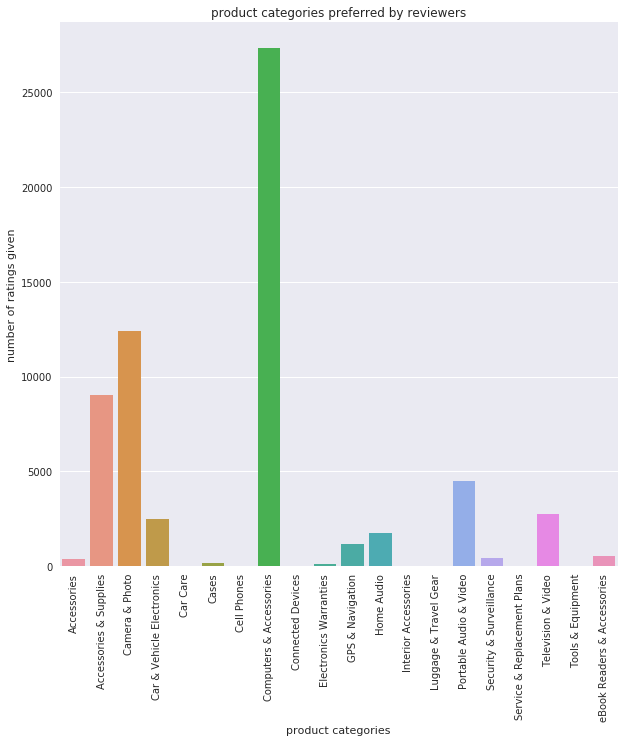

In [218]:
category_count = asin_to_overall_count_category.groupby(by='category')['overall'].count()
fig, ax = plt.subplots(figsize=(10,10))
barplot = sns.barplot(x=category_count.index, 
            y=category_count,
           orient = 'v',
                     ax=ax)
ax.set_title('product categories preferred by reviewers')
ax.set(xlabel='product categories', ylabel='number of ratings given')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
barplot = barplot.get_figure()
barplot.savefig('category_pref.png') 


## overview of top 5 category overall ratings and average ratings

In [192]:
five_largest = category_count.nlargest(n=5, keep='first')
five_largest_with_means = category_mean[five_largest.index]

In [198]:
print(five_largest)
print(five_largest_with_means)

category
Computers & Accessories    27333
Camera & Photo             12391
Accessories & Supplies      9046
Portable Audio & Video      4484
Television & Video          2727
Name: overall, dtype: int64
category
Computers & Accessories    4.141728
Camera & Photo             4.210395
Accessories & Supplies     4.171981
Portable Audio & Video     3.937959
Television & Video         3.973934
Name: overall, dtype: float64


In [199]:
five_largest_df = five_largest.to_frame()
five_largest_with_means_df = five_largest_with_means.to_frame()
five_largest_with_means_df.rename(columns={'overall': 'means'}, inplace=True)
merged_counts_means = five_largest_df.join(five_largest_with_means_df)
merged_counts_means['category'] = merged_counts_means.index

In [217]:
import plotly.figure_factory as ff
import plotly.plotly as py
table_categories_overall_means = ff.create_table(merged_counts_means[merged_counts_means.columns[::-1]])
url_table_categories_overall_means = py.plot(table_categories_overall_means, filename='means-for-dashboard', auto_open=False)
py.iplot(table_categories_overall_means, filename='means-for-dashboard')